#  HEART DISEASE UCI

### Import Libraries

Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
train = pd.read_csv('heart.csv')

In [3]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Columns in the dataset->

age

sex

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - 1 or 0

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Inference - > shape - (303,14) , 13 int values and 1 float type with no value missing

In [5]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The features described in the above data set are:

1. Count tells us the number of NoN-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.

### EDA(Exploratory Data Analysis)

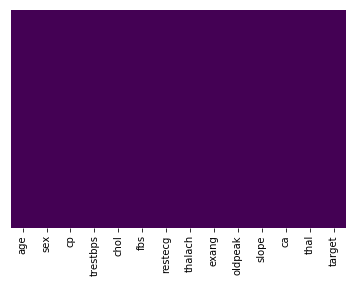

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing values in the dataset

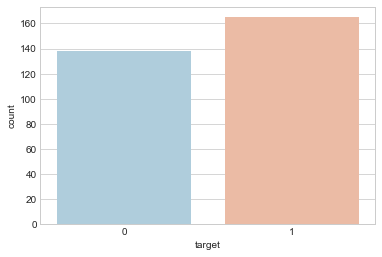

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=train,palette='RdBu_r')

Count of diseased people is more than non-diseased people by a small margin

Text(0.5,0,'TARGET\nSex (0 = female, 1= male)\nTarget (0 = not affected,1 = affected)')

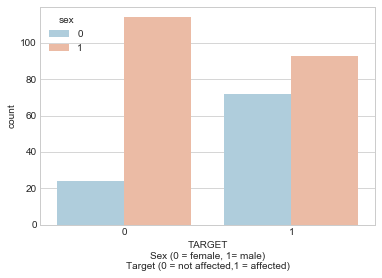

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='sex',data=train,palette='RdBu_r')
plt.xlabel("TARGET\nSex (0 = female, 1= male)\nTarget (0 = not affected,1 = affected)")

More males are affected by disease as compared to females 

Text(0.5,0,'AGE\nTarget (0 = not affected,1 = affected)')

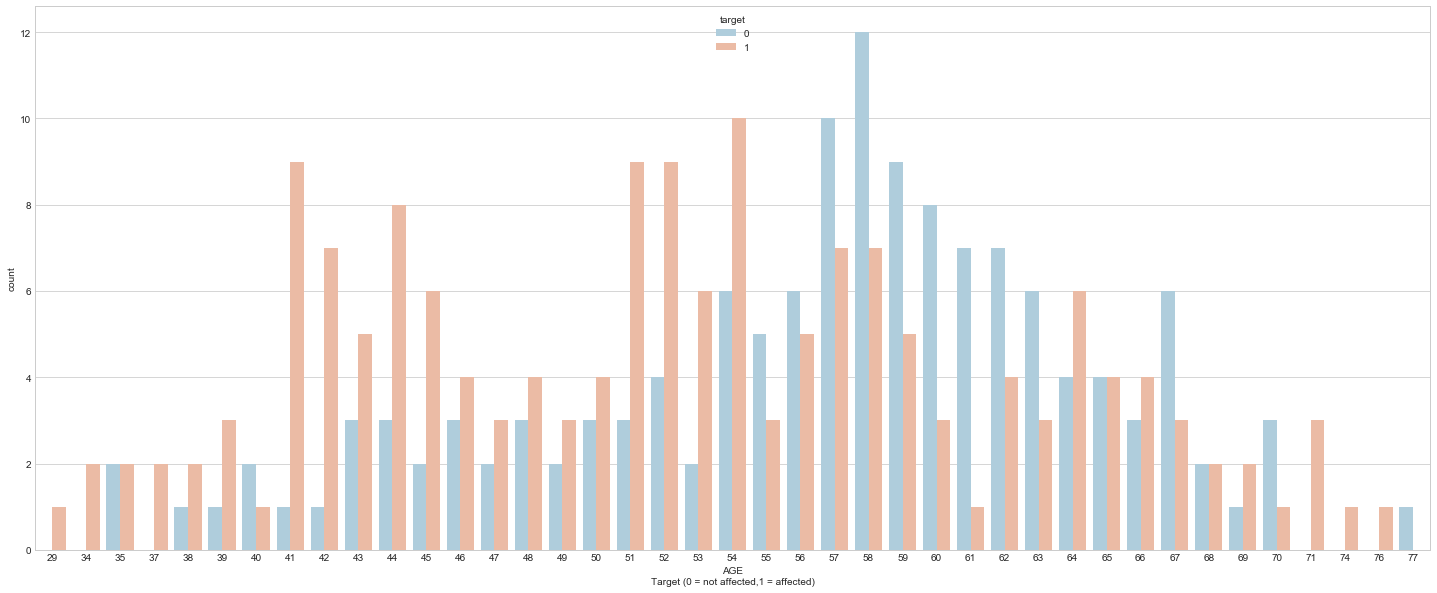

In [58]:
plt.figure(figsize=(25,10))
sns.set_style('whitegrid')
sns.countplot(x='age',hue='target',data=train,palette='RdBu_r')
plt.xlabel("AGE\nTarget (0 = not affected,1 = affected)")

People around age 41-45 and 51-54 are most likely to be affected by the disease

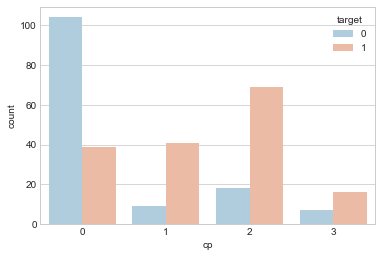

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='target',data=train,palette='RdBu_r')

People with chest pain of type 2 are most likely to get the disease

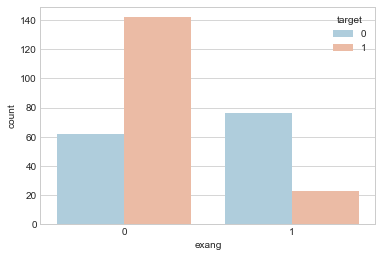

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='exang',hue='target',data=train,palette='RdBu_r')

People lacking exercise induced angina are most likely to get affected by the disease

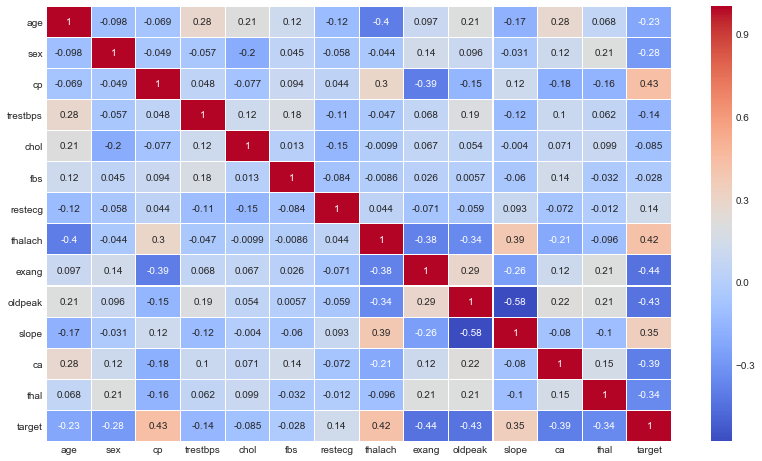

In [60]:
plt.figure(figsize=(14,8))
sns.heatmap(train.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

Minimum correlation can be indicated between fbs and oldpeak i.e. 0.0057 and maximum can be shown between oldpeak and slope 

<Figure size 1800x1440 with 0 Axes>

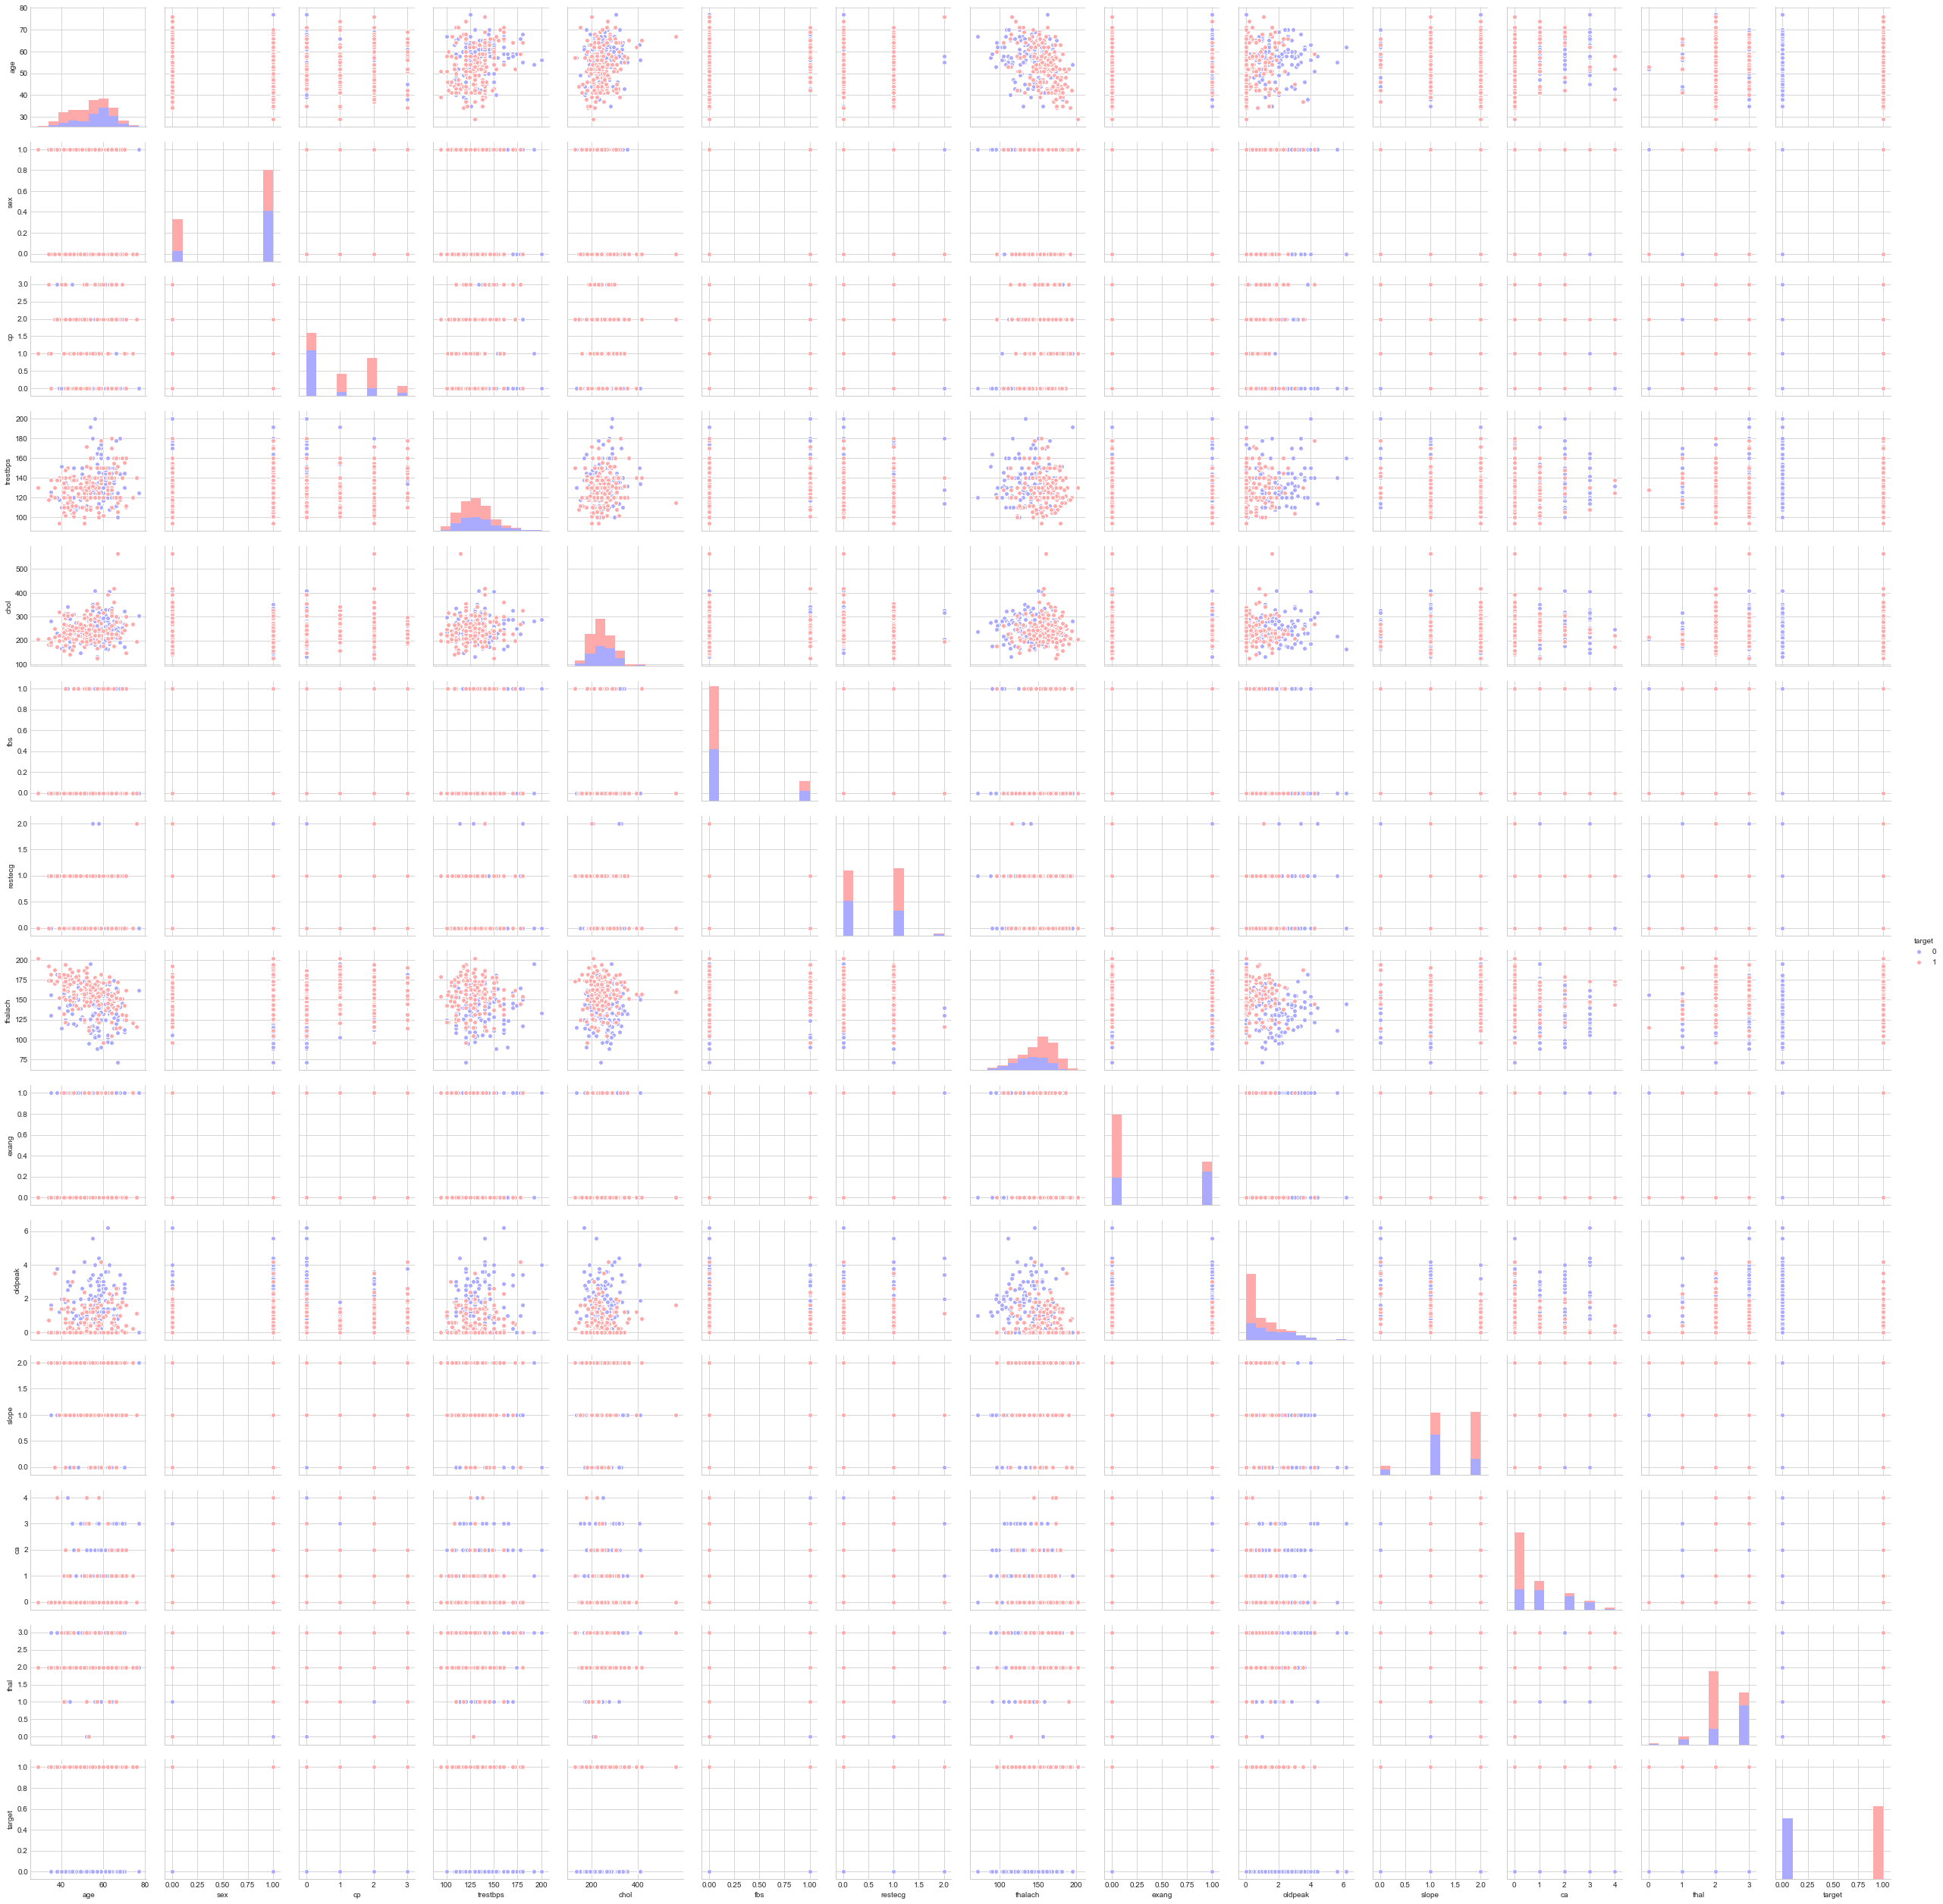

In [26]:
plt.figure(figsize=(25,20))
sns.pairplot(train,hue='target',palette='bwr')

No particular trend can be observed with this pairplot

### Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(train.drop('target', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaled_features = scaler.transform(train.drop('target', axis=1))

In [30]:
train_feat = pd.DataFrame(scaled_features, columns=train.columns[:-1])
train_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


### Splitting

In [31]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, train['target'], test_size= 0.30,random_state=101)

## Fitting the model

#### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction and Evaluation

In [55]:
predictions = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.80      0.84        44
          1       0.83      0.91      0.87        47

avg / total       0.86      0.86      0.86        91



Using classification report as evaluation metrics we can observe that the dataset gives us an accuracy of 86%

In [61]:
from sklearn.metrics import f1_score

In [62]:
f1_score(y_test, predictions)

0.8686868686868686

F1 score evaluation metrics shows us exact accuracy that is 86.868686..% that is roughly 87%

#### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree = DecisionTreeClassifier()

In [65]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction and Evaluation

In [66]:
predictions = dtree.predict(X_test)

In [68]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.64      0.74        44
          1       0.73      0.91      0.81        47

avg / total       0.80      0.78      0.78        91



Decision Tree giving an accuracy of around 80% which is less than logistic Regression

#### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Prediction and Evaluation

In [94]:
rfc_pred = rfc.predict(X_test)

In [95]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.82      0.82      0.82        44
          1       0.83      0.83      0.83        47

avg / total       0.82      0.82      0.82        91



Random Forest giving an accuracy of around 82% which is better than decision tree but still logistic regression surpasses all

#### SVM(Support Vector Machine)

In [72]:
from sklearn.svm import SVC

In [73]:
model = SVC()

In [74]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Prediction and Evaluation

In [75]:
predictions = model.predict(X_test)

In [76]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.80      0.83        44
          1       0.82      0.89      0.86        47

avg / total       0.85      0.85      0.85        91



Improved Accuracy still logistic regression will be considered best

#### KNN(K-Nearest Neighbor)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=1)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Prediction and Evaluation

In [80]:
pred = knn.predict(X_test)

In [81]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.80      0.73      0.76        44
          1       0.76      0.83      0.80        47

avg / total       0.78      0.78      0.78        91



Now we will check for best neighbor value that can be used for increasing accuracy 

In [82]:
error_rate = []

for i in range(1,40):#Loop used to determine best n_neighbor value
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

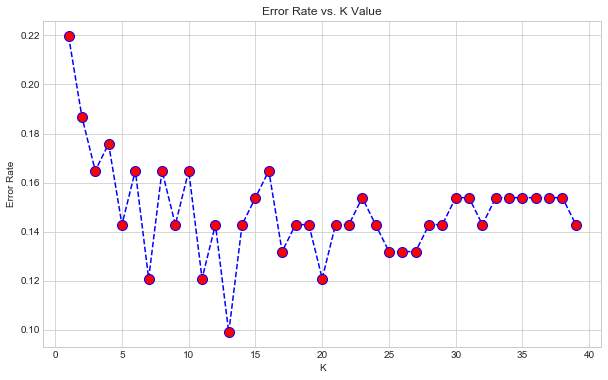

In [83]:
#Commands to print graph indicating best neighbor value that can be used
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

By above graph we can conclude that at k=13 the error is minimum so we will predict using k = 13

In [101]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.95      0.84      0.89        44
          1       0.87      0.96      0.91        47

avg / total       0.91      0.90      0.90        91



In [102]:
#Comparing knn with k =1 and k=13
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With k=1")
print("\n")

print(classification_report(y_test,pred))

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With k=13")
print("\n")

print(classification_report(y_test,pred))

With k=1


             precision    recall  f1-score   support

          0       0.80      0.73      0.76        44
          1       0.76      0.83      0.80        47

avg / total       0.78      0.78      0.78        91

With k=13


             precision    recall  f1-score   support

          0       0.95      0.84      0.89        44
          1       0.87      0.96      0.91        47

avg / total       0.91      0.90      0.90        91



KNN with k=13 gives us around 91% accuracy which is best till now

# Conclusion

The model has been analyzed which was under supervised learning and with classification category.
Exploratory data analysis was done and then model fitting was applied.
Basic train_test split was used and then various models were applied which are as follows ->

1. Logistic Regression
2. Decison Tree
3. Random Forest
4. Support Vector Machine(SVM)
5. K-Nearest Neighbor(KNN)

After the application and fitting of all the models it was found out that knn model with k=13 provides the best accuracy which is around 91% and metrics used for the prediction of accuracy is classification report.